## Native solution for 0/1 knapsack problem

In [4]:
# A naive recursive implementation of 0-1 Knapsack Problem
  
# Returns the maximum value that can be put in a knapsack of
# capacity W
def knapSack(W, wt, val, n):
  
    # Base Case
    if n == 0 or W == 0 :
        return 0
  
    # If weight of the nth item is more than Knapsack of capacity
    # W, then this item cannot be included in the optimal solution
    if (wt[n-1] > W):
        return knapSack(W, wt, val, n-1)
  
    # return the maximum of two cases:
    # (1) nth item included
    # (2) not included
    else:
        return max(val[n-1] + knapSack(W-wt[n-1], wt, val, n-1),
                   knapSack(W, wt, val, n-1))
  
# end of function knapSack
  
# To test above function
val = [135, 139, 149, 150, 156, 163, 173, 184, 192, 201, 210, 214, 221, 229, 240]
wt = [70, 73, 77, 80, 82, 87, 90, 94, 98, 106, 110, 113, 115, 118, 120]
W = 750
n = len(val)

In [7]:
# A Dynamic Programming based Python 
# Program for 0-1 Knapsack problem
# Returns the maximum value that can 
# be put in a knapsack of capacity W
def knapSack(W, wt, val, n):
    K = [[0 for x in range(W + 1)] for x in range(n + 1)]
  
    # Build table K[][] in bottom up manner
    for i in range(n + 1):
        for w in range(W + 1):
            if i == 0 or w == 0:
                K[i][w] = 0
            elif wt[i-1] <= w:
                K[i][w] = max(val[i-1] + K[i-1][w-wt[i-1]],  K[i-1][w])
            else:
                K[i][w] = K[i-1][w]
  
    return K[n][W]

In [8]:
%time
knapSack(W, wt, val, n)

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 2.86 µs


1458

## Hill Climbling algo solve 0/1 knapsack problem

In [127]:
dec_to_bin(783,10)

[1, 1, 0, 0, 0, 0, 1, 1, 1, 1]

In [8]:
import random

# Define the problem instance
val = [135, 139, 149, 150, 156, 163, 173, 184, 192, 201, 210, 214, 221, 229, 240]
wt = [70, 73, 77, 80, 82, 87, 90, 94, 98, 106, 110, 113, 115, 118, 120]
W = 750

def dec_to_bin(dec_num, digits): # translate decimal number to binary (int)
    quotient = dec_num
    bin_num = []

    if dec_num == 1 | 0:
        bin_num.append(dec_num)
        while(len(bin_num)!= digits):
            bin_num.append(0)
        return bin_num
    
    while(quotient > 0): 
        reminders = dec_num % 2 
        quotient = (dec_num - reminders) // 2 
        dec_num = quotient 
        bin_num.append(reminders)
    while(len(bin_num)!= digits):
        bin_num.append(0)

    bin_num = bin_num[::-1]
    return bin_num

def fitness(solution): # return profits if weight restrain is satisfied (bool)
    # Initialize the variable
    total_wt, total_val = 0, 0

    # Iteraterate through the input string to calculate the weights & profits
    for idx in range(len(solution)):
        if solution[idx] == 1:
            total_wt += wt[idx] # sum the weight
            total_val += val[idx] # sum the value

    # If satisfy weight restrain, return the total_val
    if total_wt <= W: 
        return total_val 
    # Otherwise, return 0
    else:
        return 0

# Define the neighborhood function
def get_neighbor(current_solution):
    neighbor = current_solution.copy()
    index = random.randint(0, len(current_solution)-1)
    neighbor[index] = 1 - neighbor[index]
    return neighbor

def hill_climbing():
    # Initialize the current solution
    current_solution = [random.randint(0, 1) for _ in range(len(val))] 
    current_fitness = fitness(current_solution)

    # Iterate until no better neighbor is found
    while True:
        # Get a neighbor solution
        neighbor_solution = get_neighbor(current_solution)
        neighbor_fitness = fitness(neighbor_solution)

        # If the neighbor is better, update the current solution
        if neighbor_fitness > current_fitness:
            current_solution = neighbor_solution
            current_fitness = neighbor_fitness
        # Otherwise, terminate and return the best solution found
        else:
            return current_solution, current_fitness
        
best_solution, best_fitness = hill_climbing()

# Print the results
print("Best Solution:", best_solution)
print("Best Fitness:", best_fitness)


Best Solution: [1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0]
Best Fitness: 0


In [41]:
condition = True # Flag for while-loop
db = [] # Store each iterateion solution
index, temp = 0, 0 # Temporary variables
while condition:
    # First iterative of HC 
    best_solution, best_fitness = hill_climbing()

    # Find optimonal solution, either equal or greater than the previous one
    if best_fitness >= temp:
        db.append(best_fitness)
        temp = best_fitness
        index += 1

    # 500 iterations     
    if index == 500:
        condition = False

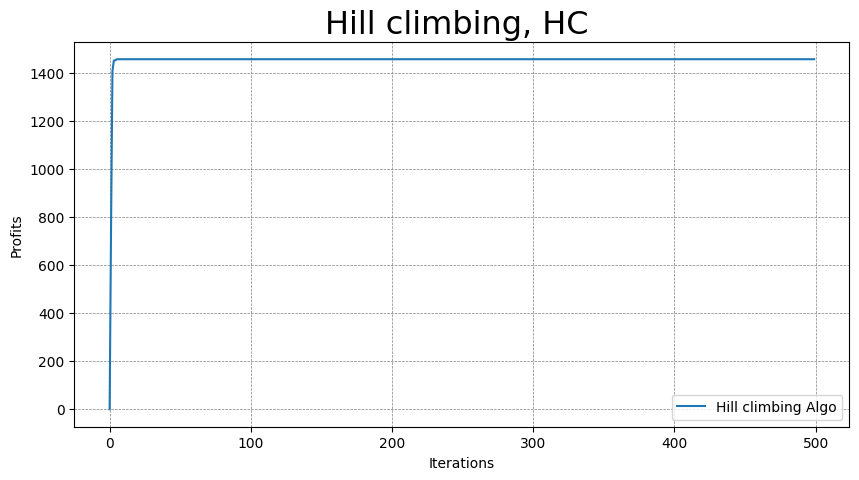

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

plt.xlabel('Iterations')
plt.ylabel('Profits')
plt.title('Hill climbing, HC ',size='23')

plt.plot(db, label='Hill climbing Algo')
plt.legend(loc='lower right')
plt.savefig('./01_knapsack_graphs.png')

plt.show()

# Simulated annealing solve